#### Load The Result of Models

##### Load the debias models train result

In [1]:
# load result file
import pandas as pd
import numpy as np
df = pd.read_csv('../result/csv/TrainByDev.csv')
# Remove rows with duplicated values
df = df.drop_duplicates()
# drop Fusion column
df = df.drop(columns=['Fusion'])
df_init = pd.read_csv('../result/csv/init_results.csv')
df = df.join(df_init.set_index(['Base_Model','Dataset_Name']), on=['Base_Model','Dataset_Name'], rsuffix='_init')
df['InitAcc'] = df['Init_ACC']
df['InitF1'] = df['Init_F1']
df['InitFairness'] = df['Init_Word_Fairness']
df.drop(columns=['Init_ACC','Init_F1','Init_Word_Fairness'], inplace=True)
df.loc[df['Ngram'] == 2, 'Stereotype'] = 'Bigram'


##### Load the init train result

In [2]:
# We join the init results with the final results to compare the difference
# Joining With Init Columns
df_trim = df[['Base_Model','Dataset_Name','Stereotype','FinalF1','FinalBaseF1','InitF1','InitFairness','FinalFairness','TrainEpoch']]
# sort by Dataset_Name and Base_Model and Stereotype then move Dataset_Name to first column
df_trim = df_trim.sort_values(by=['Dataset_Name','Base_Model','Stereotype'])
df_trim = df_trim[['Dataset_Name','Base_Model','Stereotype','FinalBaseF1','FinalF1','InitF1','InitFairness','FinalFairness','TrainEpoch']]
#put background color if InitF1 is greater than FinalF1

df_normal = df_trim[(df_trim['Stereotype'] == 'Normal') & (df_trim['TrainEpoch'] == 40)]
df_normal = df_normal.reset_index(drop=True)


##### Compare the Init Training and The Debias Result

We willl compare the Macro F1 score and the word fairness, and highlight the rows where init models is better than the final models. 

In [3]:

def highlight_larger(df):
    mask = df['InitF1'] > df['FinalF1']
    df_style = pd.DataFrame('', index=df.index, columns=df.columns)
    df_style.loc[mask, ['InitF1', 'FinalF1']] = 'background-color: brown'
    return df_style

df_normal.style.apply(highlight_larger, axis=None)


,Dataset_Name,Base_Model,Stereotype,FinalBaseF1,FinalF1,InitF1,InitFairness,FinalFairness,TrainEpoch
0,ARC,TextCNN,Normal,0.578714,0.504524,0.528883,42.036560,41.246891,40.000000
1,ARC,TextRCNN,Normal,0.516946,0.516946,0.569049,41.446255,41.773226,40.000000
2,Amazon,TextRCNN,Normal,0.738298,0.738298,0.743151,16.210424,16.149594,40.000000
3,Economy,TextCNN,Normal,0.578216,0.551573,0.581171,18.323976,19.498599,40.000000
4,Economy,TextRCNN,Normal,0.449775,0.537123,0.601323,17.857359,20.569344,40.000000
5,HyperPartisan,TextCNN,Normal,0.759514,0.718615,0.725159,18.360448,18.262161,40.000000
6,HyperPartisan,TextRCNN,Normal,0.761088,0.761088,0.763636,17.478048,17.699153,40.000000
7,SCIERC,TextCNN,Normal,0.373544,0.395714,0.448077,37.654430,37.305413,40.000000
8,SCIERC,TextRCNN,Normal,0.594942,0.605226,0.624815,37.935240,36.505452,40.000000
9,Twitter,TextCNN,Normal,0.818077,0.822917,0.820453,19.458007,18.651174,40.000000


Here we can see that the Init F1 and Final F1 score look very similiar. We will try to quantify the difference between the two scores, by summing them up.

(Admittedly, This might not be a very precise method.)


In [4]:
# average difference of Final F1 and Init F1
(sum(df_normal['FinalF1']) - sum(df_normal['InitF1']))/len(df_normal)

-0.022559504600939917

In [5]:
# average difference of Word Fairness for Final models and Init models and NORMALIZE 
(sum(df_normal['FinalFairness']) - sum(df_normal['InitFairness']))/len(df_normal)


0.05831974613159797

##### Compare the word fairness of the final model and the init model

In [6]:
def highlight_larger(df):
    mask = df['InitFairness'] > df['FinalFairness']
    df_style = pd.DataFrame('', index=df.index, columns=df.columns)
    df_style.loc[mask, ['InitFairness', 'FinalFairness']] = 'background-color: brown'
    return df_style

df_normal.style.apply(highlight_larger, axis=None)

,Dataset_Name,Base_Model,Stereotype,FinalBaseF1,FinalF1,InitF1,InitFairness,FinalFairness,TrainEpoch
0,ARC,TextCNN,Normal,0.578714,0.504524,0.528883,42.036560,41.246891,40.000000
1,ARC,TextRCNN,Normal,0.516946,0.516946,0.569049,41.446255,41.773226,40.000000
2,Amazon,TextRCNN,Normal,0.738298,0.738298,0.743151,16.210424,16.149594,40.000000
3,Economy,TextCNN,Normal,0.578216,0.551573,0.581171,18.323976,19.498599,40.000000
4,Economy,TextRCNN,Normal,0.449775,0.537123,0.601323,17.857359,20.569344,40.000000
5,HyperPartisan,TextCNN,Normal,0.759514,0.718615,0.725159,18.360448,18.262161,40.000000
6,HyperPartisan,TextRCNN,Normal,0.761088,0.761088,0.763636,17.478048,17.699153,40.000000
7,SCIERC,TextCNN,Normal,0.373544,0.395714,0.448077,37.654430,37.305413,40.000000
8,SCIERC,TextRCNN,Normal,0.594942,0.605226,0.624815,37.935240,36.505452,40.000000
9,Twitter,TextCNN,Normal,0.818077,0.822917,0.820453,19.458007,18.651174,40.000000


In [7]:
# Group data by Dataset_name and Base_Model, then for each Stereotype we compare the FinalF1 and FinalFairness with Stereotype = Normal
normal = df_trim[(df_trim['Stereotype'] == 'Normal') & (df_trim['TrainEpoch'] != 40)]
# drop column where NEpoch is 40
df_trim = df_trim[df_trim['TrainEpoch'] != 40]
# Merge the normal DataFrame back into the original DataFrame based on 'Dataset_Name' and 'Base_Model'
merged = pd.merge(df_trim, normal, on=['Dataset_Name', 'Base_Model'], suffixes=('', '_Normal'))

# Calculate the difference in 'Accuracy' compared to 'Normal' stereotype
merged['Accuracy_Difference'] = merged['FinalF1'] - merged['FinalF1_Normal']
merged['Fairness_Difference'] = merged['FinalFairness'] - merged['FinalFairness_Normal']
merged = merged[['Dataset_Name','Base_Model','Stereotype',"FinalF1","FinalFairness","Accuracy_Difference",'Fairness_Difference']] 

In [8]:
df[df["Stereotype"] == "Bigram"]

,Base_Model,Stereotype,Dataset_Name,Sigma,Round,InitAcc,InitF1,InitFairness,FinalAcc,FinalBaseAcc,FinalF1,FinalBaseF1,FinalFairness,FinalBaseFairness,Ngram,TrainEpoch,InitEpoch
39,TextRCNN,Bigram,HyperPartisan,0.00,1,0.769231,0.763636,17.478048,0.769231,0.769231,0.763636,0.763636,17.450994,17.450994,2.0,NaN,40.0
40,TextCNN,Bigram,HyperPartisan,0.00,1,0.753846,0.725159,18.360448,0.769231,0.784615,0.739374,0.759514,18.262161,18.262161,2.0,NaN,40.0
41,TextRCNN,Bigram,Economy,0.00,1,0.765101,0.601323,17.857359,0.746644,0.765101,0.594596,0.561719,17.488612,18.783793,2.0,NaN,40.0
43,TextCNN,Bigram,Economy,0.90,1,0.755034,0.581171,18.323976,0.763423,0.760067,0.552845,0.557962,18.893564,18.721681,2.0,NaN,40.0
46,TextRCNN,Bigram,Amazon,0.35,1,0.743333,0.743151,16.210424,0.748333,0.748333,0.748316,0.748316,16.150770,16.150770,2.0,NaN,40.0
47,TextCNN,Bigram,Amazon,0.35,1,0.741667,0.741142,16.228301,0.706667,0.706667,0.706340,0.706340,16.215899,16.215899,2.0,NaN,NaN
55,TextRCNN,Bigram,Parties,0.00,1,0.622763,0.618324,13.539136,0.583996,0.583996,0.578439,0.578439,13.703102,13.703102,2.0,NaN,NaN
59,TextRCNN,Bigram,News,0.05,1,0.760545,0.759006,55.097343,0.763954,0.758415,0.761875,0.753309,55.120453,55.099837,2.0,NaN,NaN
59,TextRCNN,Bigram,News,0.05,1,0.773754,0.770950,55.139190,0.763954,0.758415,0.761875,0.753309,55.120453,55.099837,2.0,NaN,40.0
63,TextCNN,Bigram,Parties,0.10,1,0.572068,0.567125,13.291699,0.566103,0.584990,0.564918,0.575746,13.532311,13.722289,2.0,NaN,NaN


In [9]:
pd.set_option('display.max_rows', None)
#sort the merged dataframe by Stereotype then Dataset_Name then Base_Model
merged = merged.sort_values(by=['Stereotype','Dataset_Name','Base_Model'])
# remove duplicate rows
merged = merged.drop_duplicates()
merged

,Dataset_Name,Base_Model,Stereotype,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
0,ARC,TextCNN,Bigram,0.523400,41.357744,0.004933,0.263218
5,ARC,TextRCNN,Bigram,0.535906,41.779726,-0.065096,-0.174198
10,Amazon,TextCNN,Bigram,0.706340,16.215899,-0.001811,0.108398
15,Amazon,TextRCNN,Bigram,0.748316,16.150770,0.018749,-0.029698
20,ChemProt,TextCNN,Bigram,0.302311,48.969398,-0.004071,0.301740
26,ChemProt,TextRCNN,Bigram,0.389011,49.911164,0.001339,0.101828
31,Economy,TextCNN,Bigram,0.552845,18.893564,0.001272,-0.605034
36,Economy,TextRCNN,Bigram,0.594596,17.488612,0.057473,-3.080732
41,HyperPartisan,TextCNN,Bigram,0.739374,18.262161,0.020760,0.000000
46,HyperPartisan,TextRCNN,Bigram,0.763636,17.450994,0.002548,-0.248160


In [10]:
# Group Dataset by Stereotype and get average difference of Accuracy and Fairness and drop the Stereotype Normal

merged.groupby(['Stereotype']).mean()


/tmp/ipykernel_593467/2820619058.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged.groupby(['Stereotype']).mean()


,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
Stereotype,,,,
Bigram,0.612704,29.738446,0.001169,-0.176362
Idiom,0.607565,29.380896,-0.003639,-0.207014
Normal,0.612063,29.293475,0.000000,0.000000
Noun,0.605428,29.579148,-0.005776,-0.008762
RandomMask,0.611061,29.829189,-0.000474,-0.085619


In [11]:
merged.groupby(['Stereotype']).mean()

/tmp/ipykernel_593467/268480671.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged.groupby(['Stereotype']).mean()


,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
Stereotype,,,,
Bigram,0.612704,29.738446,0.001169,-0.176362
Idiom,0.607565,29.380896,-0.003639,-0.207014
Normal,0.612063,29.293475,0.000000,0.000000
Noun,0.605428,29.579148,-0.005776,-0.008762
RandomMask,0.611061,29.829189,-0.000474,-0.085619


In [12]:
merged.groupby(['Stereotype']).std()

/tmp/ipykernel_593467/3296577527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged.groupby(['Stereotype']).std()


,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
Stereotype,,,,
Bigram,0.152818,15.557559,0.023515,0.773810
Idiom,0.150081,15.204914,0.021788,1.012140
Normal,0.143605,14.635422,0.000000,0.000000
Noun,0.146470,15.072396,0.016354,0.352714
RandomMask,0.152067,15.463968,0.011395,0.306781


In [13]:
0.612704 - 0.001169

0.611535

In [14]:
merged[merged['Stereotype'] == 'Bigram']

,Dataset_Name,Base_Model,Stereotype,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
0,ARC,TextCNN,Bigram,0.523400,41.357744,0.004933,0.263218
5,ARC,TextRCNN,Bigram,0.535906,41.779726,-0.065096,-0.174198
10,Amazon,TextCNN,Bigram,0.706340,16.215899,-0.001811,0.108398
15,Amazon,TextRCNN,Bigram,0.748316,16.150770,0.018749,-0.029698
20,ChemProt,TextCNN,Bigram,0.302311,48.969398,-0.004071,0.301740
26,ChemProt,TextRCNN,Bigram,0.389011,49.911164,0.001339,0.101828
31,Economy,TextCNN,Bigram,0.552845,18.893564,0.001272,-0.605034
36,Economy,TextRCNN,Bigram,0.594596,17.488612,0.057473,-3.080732
41,HyperPartisan,TextCNN,Bigram,0.739374,18.262161,0.020760,0.000000
46,HyperPartisan,TextRCNN,Bigram,0.763636,17.450994,0.002548,-0.248160


In [15]:
merged[merged['Stereotype'] == 'Normal']

,Dataset_Name,Base_Model,Stereotype,FinalF1,FinalFairness,Accuracy_Difference,Fairness_Difference
2,ARC,TextCNN,Normal,0.518467,41.094526,0.0,0.0
7,ARC,TextRCNN,Normal,0.601003,41.953924,0.0,0.0
12,Amazon,TextCNN,Normal,0.708151,16.107501,0.0,0.0
17,Amazon,TextRCNN,Normal,0.729567,16.180468,0.0,0.0
23,ChemProt,TextCNN,Normal,0.306382,48.667658,0.0,0.0
28,ChemProt,TextRCNN,Normal,0.387671,49.809336,0.0,0.0
33,Economy,TextCNN,Normal,0.551573,19.498599,0.0,0.0
38,Economy,TextRCNN,Normal,0.537123,20.569344,0.0,0.0
43,HyperPartisan,TextCNN,Normal,0.718615,18.262161,0.0,0.0
48,HyperPartisan,TextRCNN,Normal,0.761088,17.699153,0.0,0.0


In [36]:
# plot the training graph

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# read csv without index column
train_df = pd.read_csv('../result/csv/train.csv', index_col=False)
group_df = train_df.groupby(['Dataset','Model','Stereotype'])


/tmp/ipykernel_593467/787380740.py:8: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv('../result/csv/train.csv', index_col=False)


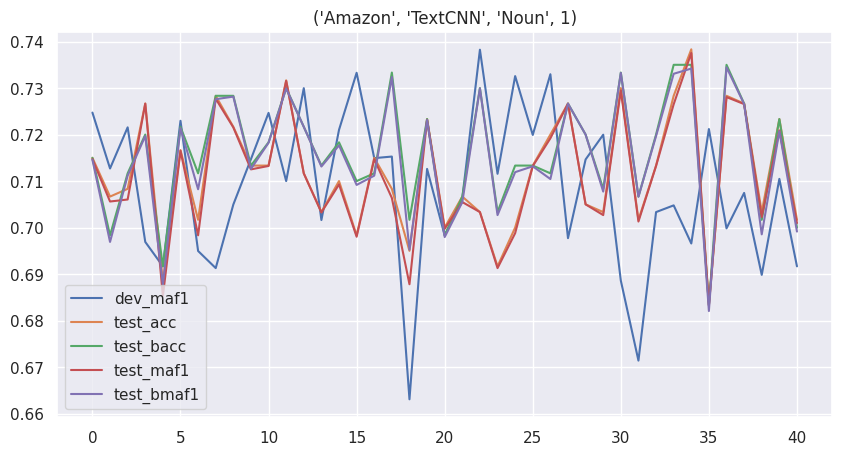

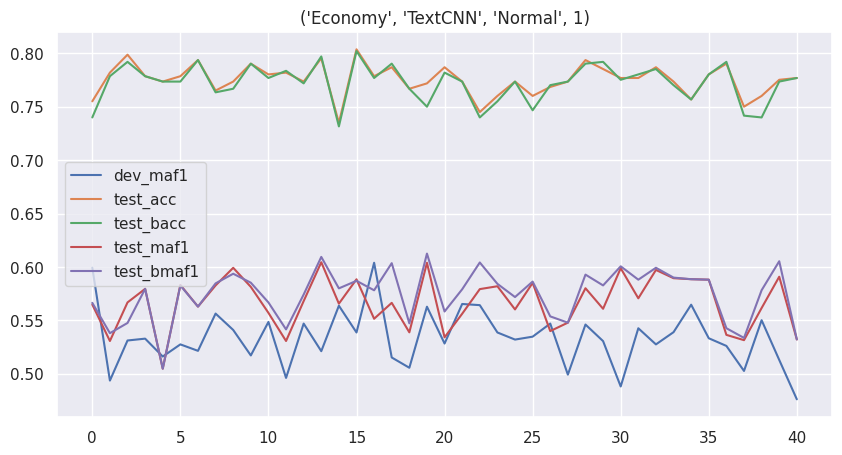

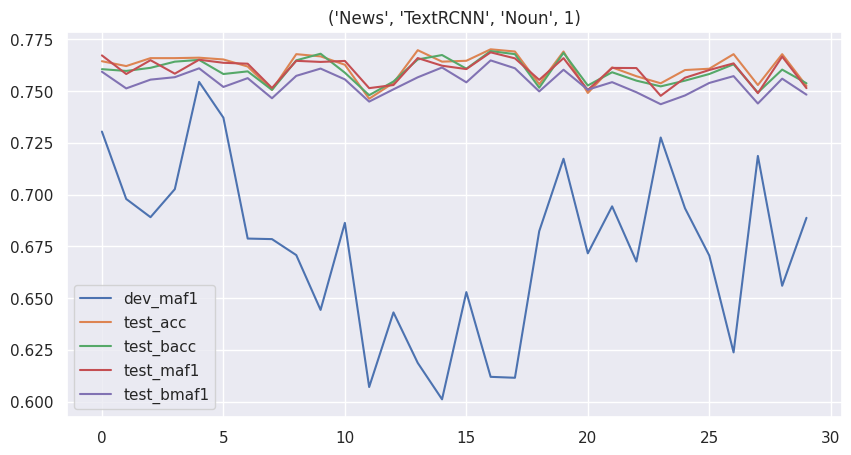

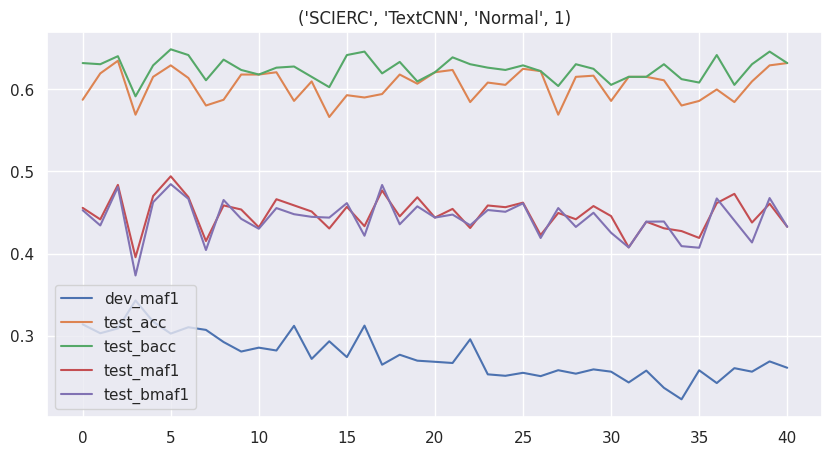

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Ensure DataFrame is sorted by 'mark'
train_df = train_df.sort_values('mark')

# Group DataFrame
grouped = train_df.groupby(['Dataset', 'Model', 'Stereotype', 'N_GRAM'])

# For each group, create a separate line plot for each numerical column
for name, group in grouped:
    # print(name)
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed

    for column in ['dev_maf1', 'test_acc', 'test_bacc', 'test_maf1', 'test_bmaf1']:
        plt.plot(group['mark'], group[column], label=column)

    plt.title(name)
    plt.legend()

    plt.show()


In [35]:
train_df

,Dataset,Model,Stereotype,N_GRAM,dev_maf1,test_acc,test_bacc,test_maf1,test_bmaf1,mark,BatchNo
Amazon,TextCNN,Noun,1,0.724724,0.715000,0.715000,0.714714,0.714581,0,40,0
SCIERC,TextCNN,Normal,1,0.314101,0.587169,0.631799,0.455744,0.452915,0,40,0
Economy,TextCNN,Normal,1,0.599397,0.755034,0.739933,0.564876,0.566468,0,40,0
Amazon,TextCNN,Noun,1,0.712708,0.706667,0.698333,0.705607,0.696918,1,40,0
SCIERC,TextCNN,Normal,1,0.303304,0.619247,0.630404,0.441757,0.434367,1,40,0
Economy,TextCNN,Normal,1,0.493732,0.781879,0.778523,0.530766,0.538082,1,40,0
SCIERC,TextCNN,Normal,1,0.309177,0.634589,0.640167,0.483673,0.481104,2,40,0
Amazon,TextCNN,Noun,1,0.721551,0.708333,0.711667,0.706040,0.711165,2,40,0
Economy,TextCNN,Normal,1,0.531233,0.798658,0.791946,0.566860,0.547634,2,40,0
SCIERC,TextCNN,Normal,1,0.343134,0.569038,0.591353,0.395714,0.373544,3,40,0
